<a href="https://colab.research.google.com/github/Matrixmax/Dive_into_DeepLearning/blob/main/0x03_%E7%BA%BF%E6%80%A7%E4%BB%A3%E6%95%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 标量

In [1]:
import torch

x = torch.tensor([3.0])
y = torch.tensor([2.0])

x + y, x * y, x / y, x**y

(tensor([5.]), tensor([6.]), tensor([1.5000]), tensor([9.]))

## 2. 向量

In [2]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

## 3. 矩阵

In [3]:
A = torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [4]:
# 实现矩阵的转置
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [5]:
# 对称矩阵A等于其转置At
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [6]:
B ==B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

## 4. 张量


In [7]:
X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [8]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  # 通过分配新内存，将A的一个副本分配给B
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [9]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [10]:
a = 2
X = torch.arange(24).reshape(2,3,4)
a+X,(a*X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]), torch.Size([2, 3, 4]))

In [11]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [12]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

默认情况下，调用求和函数会将一个张量在所有轴上汇总为一个标量。 我们还可以指定求和汇总张量的轴。以矩阵为例。为了通过求和所有行的元素来汇总行维度（轴0），我们可以在调用函数时指定axis=0。 由于输入矩阵沿0轴汇总以生成输出向量，因此输入的轴0的维数在输出形状中丢失。

In [13]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [14]:
# 有时在调用函数来计算总和或均值时保持轴数不变会很有用。
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [15]:
# 如果我们想沿某个轴计算 A 元素的累积总和，比如 axis=0（按行计算），
# 我们可以调用 cumsum 函数。此函数不会沿任何轴汇总输入张量。
A.cumsum(axis=0)


tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

## 7. 点积

In [16]:
y = torch.ones(4,dtype=torch.float32)
x, y, torch.dot(x,y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [17]:
torch.sum(x*y)

tensor(6.)

## 8. 矩阵向量积


In [18]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

In [19]:
B = torch.ones(4,3)
torch.mm(A,B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

## 10. 范数

线性代数中一些最有用的运算符是 范数（norms）。非正式地说，一个向量的范数告诉我们一个向量有多大。 这里考虑的 大小（size） 概念不涉及维度，而是分量的大小。
在线性代数中，向量范数是将向量映射到标量的函数  f 。向量范数要满足一些属性。 给定任意向量  x ，第一个性质说，如果我们按常数因子  α  缩放向量的所有元素，其范数也会按相同常数因子的 绝对值 缩放：
第二个性质是我们熟悉的三角不等式:
第三个性质简单地说范数必须是非负的:


范数听起来很像距离的度量。如果你还记得小学时的欧几里得距离(想想毕达哥拉斯定理)，那么非负性的概念和三角不等式可能会给你一些启发。 事实上，欧几里得距离是一个范数：具体而言，它是  L2  范数。假设 n -维向量:math:mathbf{x}中的元素是 x1,…,xn  的  L2  范数 是向量元素平方和的平方根：

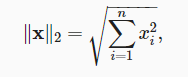




In [21]:
# 计算L2范数
u = torch.tensor([3.0,-4.0])
torch.norm(u)

tensor(5.)

你还会经常遇到  L1  范数，它表示为向量元素的绝对值之和：

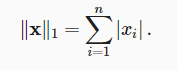


In [22]:
torch.abs(u).sum()

tensor(7.)